In [14]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# autoreload module
%load_ext autoreload
% autoreload 2

In [3]:
# import cleaner script
import cleaning_helper

In [4]:
dataframe = pd.read_csv("data/train.csv")

In [5]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Expected problems
    1. Cabin has NaN values. No need to fix since concluding from the Tableau analysis we know that this is not important
    2. Age has NaN values. But this is important for modelling the data. So we need to figure out a way to fill these values without disturbing the data.
    3. Embarked has two missing values. We can simply fill these with the most frequent values.

In [6]:
dataframe.drop(labels=['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
dataframe[dataframe['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [8]:
cleaning_helper.fix_embarked(dataframe)

In [9]:
dataframe.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Working with the Age field
    1. Problem 1 : Want to convert the continuous to a nominal variable.
    2. Problem 2 : Remove the NaN values by replacing the values from roughly the same distribution.

In [10]:
# cutting the age_variable
ans = cleaning_helper.cut_age_variable(dataframe)
# creating the distribution list
dist_list = cleaning_helper.create_distribution_list(ans)
# populating the Age NaNs

cleaning_helper.fix_age(dataframe, dist_list, ans)

In [22]:
dataframe.groupby(by=['dis_age','Survived']).sum()

Pclass      Age  SibSp  Parch       Fare
dis_age Survived                                          
0       0            377  2354.00     44     17  2676.2912
        1            165  1317.00     39     43  3771.8667
1       0            217  2391.50     40     34  1791.6248
        1             89  1877.50     28     25  4544.2666
2       0            345  2937.50     56     29  2564.3913
        1            154  1867.00     22     11  2435.2542
4       0             67  1251.50     16      7   957.8167
        1             39  1086.00     14     10  1419.0459
5       0             84    67.00     63     25   797.4333
        1             93   114.17     35     48  1088.3833
6       0            101   354.50     63     32  1026.0834
        1             49   265.00      7     11   819.6668
7       0             34   903.00      2      7   690.1166
        1             18   544.00      4      2   683.0083
8       0             21   613.50      1      2   302.2376
        1              3     0.00      0      0     7.7875
9       0            138  2039.00     18     28  1313.4500
        1             56  1069.00     13      9  1751.9501
10      0              6    74.00      1      0    23.2750
        1              1    80.00      0      0    30.0000

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

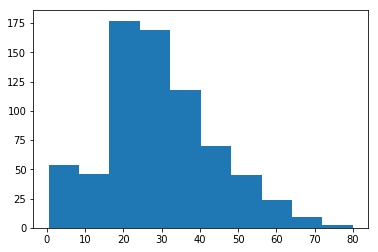

In [19]:
plt.hist(dataframe[dataframe.Age.notnull()]['Age'], bins=10)

In [62]:
dataframe.groupby('dis_age').sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
dis_age,,,,,,
0,75,520,3671.00,80,57,6402.5497
1,62,312,4269.00,60,58,6056.2413
2,80,541,4804.50,89,46,5744.0329
4,22,96,2337.50,20,11,2273.8251
5,39,167,181.17,96,75,1846.4666
6,23,155,619.50,72,44,1758.6294
7,9,53,1447.00,17,12,1459.4082
8,1,21,613.50,1,2,295.3084
9,30,188,3108.00,31,35,2819.7127


In [60]:
dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dis_age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [310]:
def discretize_field(series):
    u_values = series.unique()
    h_map = {}
    counter = 0
    for u in u_values:
        if u not in h_map:
            h_map[u] = counter
            counter += 1
    new_list = list()
    for each in dataframe.Embarked:
        new_list.append(h_map[each]) 
    return pd.Series(new_list)
    
    
ans = discretize_field(dataframe['Embarked'])
dataframe['dis_embarked'] = discretize_field(dataframe.Embarked)
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dis_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


## working with the Name column.

In [318]:
dataframe.Name.str.extract("([A-Za-z]*\.)").unique()

C:\Users\achin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [324]:
def working_with_names(df):
    ex_series = df.Name.str.extract("([A-Za-z]*\.)")
    unique_values = ex_series.unique()
    h_map = {}
    counter = 0
    for u in unique_values:
        if u not in h_map:
            h_map[u] = counter
            counter += 1
    new_list = list()
    for each in ex_series:
        new_list.append(h_map[each]) 
    return pd.Series(new_list) 

dataframe['dis_name'] = working_with_names(dataframe)

C:\Users\achin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [325]:
dataframe.dis_name.value_counts()

0     517
2     182
1     125
3      40
6       7
5       6
13      2
12      2
9       2
4       1
16      1
7       1
15      1
10      1
11      1
14      1
8       1
Name: dis_name, dtype: int64

## working with the Sex 

In [327]:
def working_with_names(df):
    ex_series = df.Sex
    unique_values = ex_series.unique()
    h_map = {}
    counter = 0
    for u in unique_values:
        if u not in h_map:
            h_map[u] = counter
            counter += 1
    new_list = list()
    for each in ex_series:
        new_list.append(h_map[each]) 
    return pd.Series(new_list) 

dataframe['dis_sex'] = working_with_names(dataframe) 

In [332]:
dataframe.Age = dataframe.Age.astype(int)

In [334]:
dataframe.drop(['Name','Sex'], axis=1, inplace=True)
dataframe.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,dis_embarked,dis_name,dis_sex
0,1,0,3,22,1,0,7.2500,S,0,0,0
1,2,1,1,38,1,0,71.2833,C,1,1,1
2,3,1,3,26,0,0,7.9250,S,0,2,1
3,4,1,1,35,1,0,53.1000,S,0,1,1
4,5,0,3,35,0,0,8.0500,S,0,0,0


In [336]:
dataframe.drop(['PassengerId'], axis=1, inplace=True)

ValueError: labels ['PassengerId'] not contained in axis

In [337]:
dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,dis_embarked,dis_name,dis_sex
0,0,3,22,1,0,7.2500,S,0,0,0
1,1,1,38,1,0,71.2833,C,1,1,1
2,1,3,26,0,0,7.9250,S,0,2,1
3,1,1,35,1,0,53.1000,S,0,1,1
4,0,3,35,0,0,8.0500,S,0,0,0
